In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [55]:
x,y = make_regression(n_samples = 4 , n_features = 1 , 
                      n_informative = 1 , n_targets= 1 ,
                      noise= 80,random_state = 13
                      )

In [56]:
x , y

(array([[-0.71239066],
        [ 0.45181234],
        [-0.04450308],
        [ 0.75376638]]),
 array([  7.21786552,  16.04609925, -27.83756166, 144.36688189]))

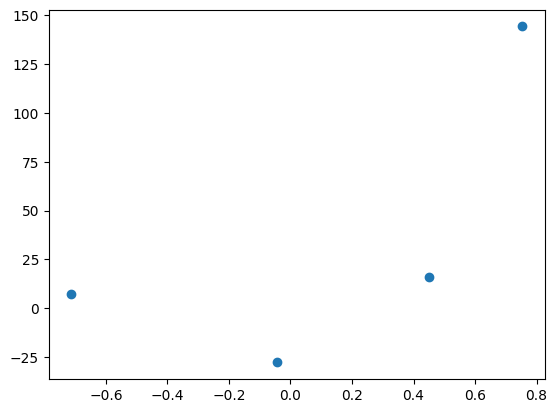

In [57]:
plt.scatter(x,y)
plt.show()

In [58]:
model = LinearRegression()

In [59]:
model.fit(x,y)

LinearRegression()

In [60]:
model.coef_,model.intercept_

(array([78.35063668]), 26.15963284313262)

In [61]:
m = model.coef_ #m as constant
b = -120 # something random
lr = 0.1 # Learning rate

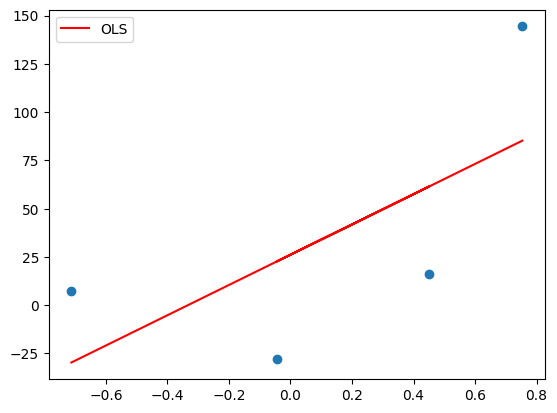

In [62]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "red",label = "OLS")
plt.legend()
plt.show()

In [63]:
y_pred = (m*x + b).reshape(4)
y_pred

array([-175.81626194,  -84.6002156 , -123.48684452,  -60.94192432])

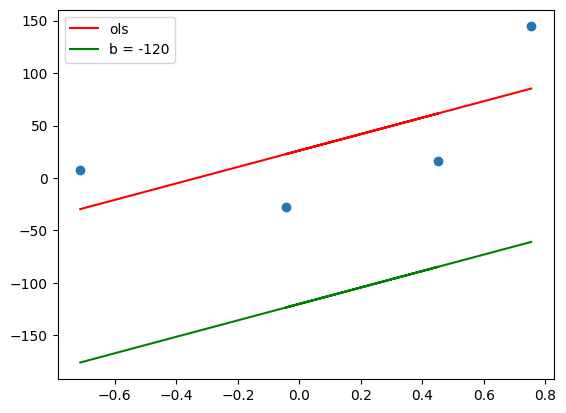

In [64]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "red",label = "ols")
plt.plot(x,y_pred,color = "green",label = "b = -120")
plt.legend()
plt.show()

In [65]:
loss_slope = -2 * np.sum(y - m*x.ravel() - b)

b = b - lr * loss_slope
b

-3.072293725493907

In [66]:
y_pred1 = (m*x + b).reshape(4)

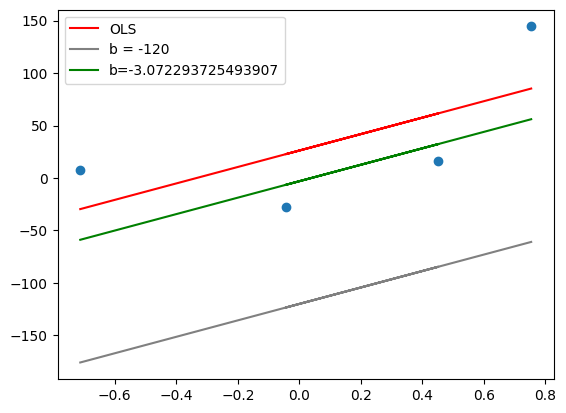

In [67]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color  = "red" , label = "OLS")
plt.plot(x,y_pred,color = "grey" , label = "b = -120")
plt.plot(x,y_pred1,color = "green" , label = "b={}".format(b))
plt.legend()
plt.show()

In [68]:
loss_slope = -2* np.sum(y - m*x.ravel() - b)
b = b - lr*loss_slope
b

20.31324752940732

In [69]:
y_pred2 = (m*x + b).reshape(4)

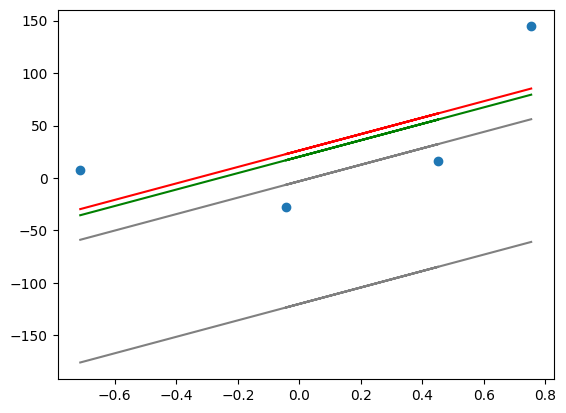

In [71]:
plt.scatter(x,y)
plt.plot(x,model.predict(x), color = "red" , label = "OLS")
plt.plot(x,y_pred , color ="grey" , label = "b = -120" )
plt.plot(x,y_pred1 , color = "grey" , label = "b = -3.07")
plt.plot(x,y_pred2 ,color = "green" , label = "b = {}".format(b))

### Above we do it with step - by - step now we will use iteration
### Fresh start

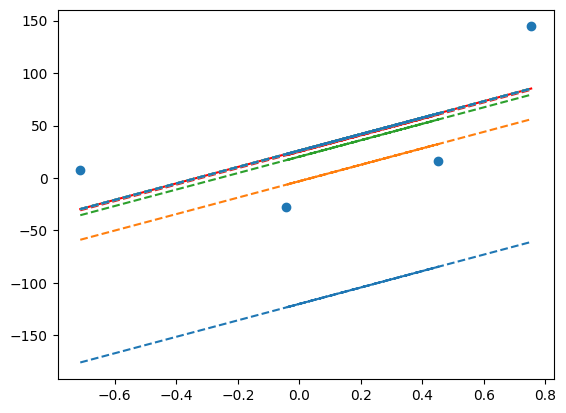

In [79]:
m = model.coef_
lr = 0.1
b = -120
epochs = 10

plt.scatter(x,y)
plt.plot(x,model.predict(x) , color = "red")

for i in range (epochs+1):
    y_pred = (m*x + b ).reshape(4)
    plt.plot(x,y_pred,linestyle= "--")

    loss_slope = -2 * np.sum(y - m*x.ravel() - b)
    b = b - lr * loss_slope
plt.show()

In [75]:
b

26.15962984978334

**Now we will optimize both `m` and `b`**

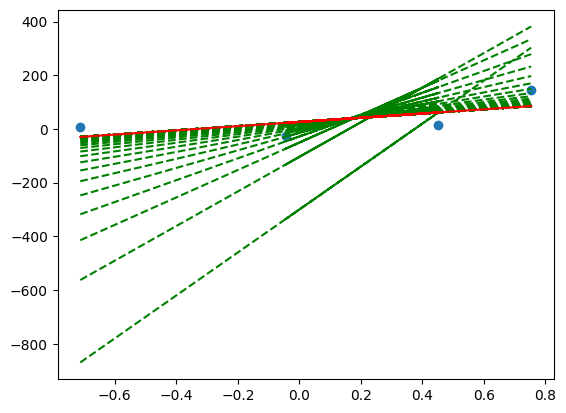

In [86]:
m = 800
b = -300
lr = 0.1
epochs = 100

plt.scatter(x,y)
for i in range(epochs):
    y_pred = (m*x + b).reshape(4)
    b_slope = -2*np.sum(y - m*x.ravel()-b)
    m_slope = -2*np.sum(x.ravel()*(y - m*x.ravel() - b))
    b = b - lr*b_slope
    m = m - lr*m_slope
    plt.plot(x,y_pred,color = "green",linestyle = "--")
y_pred = (m*x + b).reshape(4)
plt.plot(x,y_pred,color = "Red")
plt.show()


In [87]:
m,b

(78.35063668018105, 26.159632843019086)

### <font Color = "Red">Code of Gadient Descent For Multiple Regression </font>

In [ ]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836]
151.88334520854633


In [ ]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399387660024645

In [ ]:
X_train.shape

(353, 10)

In [ ]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
gdr = GDRegressor(epochs=1000,learning_rate=0.5)

In [ ]:
gdr.fit(X_train,y_train)

152.0135263267291 [  14.38915082 -173.72674118  491.54504015  323.91983579  -39.32680194
 -116.01099114 -194.04229501  103.38216641  451.63385893   97.57119174]


In [ ]:
y_pred = gdr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.4534524671450598